<a href="https://colab.research.google.com/github/kevorkian-mano/Motor_Vehicle_Collisions_Project/blob/main/Cleaned_Person.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step1 Loading The Data**

In [1]:
import pandas as pd
# Load persons dataset
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons1 = pd.read_csv(persons_url , low_memory=False)

In [2]:
# make a full (deep) copy so that changes to df_persons don't affect df_persons1
df_persons = df_persons1.copy(deep=True)

# **Step2 Exploring The Data**



## Motor Vehicle Collisions - Person

**UNIQUE_ID:** A unique identifier for each record/person in the dataset.

**COLLISION_ID:** (Join Link With Other Dataset) An identifier linking the person record to a specific collision incident.

**CRASH_DATE:** The date when the crash occurred.

**CRASH_TIME:** The time when the crash occurred.

**PERSON_ID:** An identifier for the person involved in the crash.

**PERSON_TYPE:** The type of person involved (e.g., Occupant, Pedestrian, Cyclist).

**PERSON_INJURY:** The severity of injury sustained by the person (e.g., Injured, Killed, Unspecified).

**VEHICLE_ID:** An identifier linking the person to a specific vehicle involved in the crash.

**PERSON_AGE:** The age of the person involved.

**EJECTION:** Information about whether the person was ejected from the vehicle.

**EMOTIONAL_STATUS:** The emotional state of the person.

**BODILY_INJURY:** The part of the body injured.

**POSITION_IN_VEHICLE:** The position of the person within the vehicle.

**SAFETY_EQUIPMENT:** The type of safety equipment used by the person.

**PED_LOCATION:** The location of a pedestrian at the time of the crash.

**PED_ACTION:** The action a pedestrian was taking at the time of the crash.

**COMPLAINT:** The nature of the person's complaint after the crash.

**PED_ROLE:** The role of a pedestrian in the crash.

**CONTRIBUTING_FACTOR_1:** The primary contributing factor to the crash related to the person.

**CONTRIBUTING_FACTOR_2:** The secondary contributing factor to the crash related to the person.

**PERSON_SEX:** The sex of the person involved.

In [ ]:
df_persons.info()
df_persons.shape
sample_persons = df_persons.sample(10000, random_state=42)
sample_persons.head(10)
sample_persons.columns.tolist()
sample_persons.isna().sum().sort_values(ascending=False).head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817173 entries, 0 to 5817172
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   CRASH_DATE             object 
 3   CRASH_TIME             object 
 4   PERSON_ID              object 
 5   PERSON_TYPE            object 
 6   PERSON_INJURY          object 
 7   VEHICLE_ID             float64
 8   PERSON_AGE             float64
 9   EJECTION               object 
 10  EMOTIONAL_STATUS       object 
 11  BODILY_INJURY          object 
 12  POSITION_IN_VEHICLE    object 
 13  SAFETY_EQUIPMENT       object 
 14  PED_LOCATION           object 
 15  PED_ACTION             object 
 16  COMPLAINT              object 
 17  PED_ROLE               object 
 18  CONTRIBUTING_FACTOR_1  object 
 19  CONTRIBUTING_FACTOR_2  object 
 20  PERSON_SEX             object 
dtypes: float64(2), int64(2), object(17)
memory usage: 932.

,0
CONTRIBUTING_FACTOR_1,9850
CONTRIBUTING_FACTOR_2,9850
PED_ACTION,9847
PED_LOCATION,9847
SAFETY_EQUIPMENT,5187
POSITION_IN_VEHICLE,4825
EJECTION,4824
EMOTIONAL_STATUS,4679
BODILY_INJURY,4678
COMPLAINT,4678


In [ ]:
df_persons.describe(include='all').T

KeyboardInterrupt: 

In [ ]:
df_persons.isnull().sum().sort_values(ascending=False).head(10)

,0
CONTRIBUTING_FACTOR_2,5716448
CONTRIBUTING_FACTOR_1,5716315
PED_ACTION,5715037
PED_LOCATION,5714936
SAFETY_EQUIPMENT,3028904
EJECTION,2826308
POSITION_IN_VEHICLE,2825852
EMOTIONAL_STATUS,2729419
BODILY_INJURY,2729376
COMPLAINT,2729369


In [ ]:
df_persons.head(120)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10253610,4230744,10/24/2019,20:57,46bf83fc-1ec2-4a50-89ff-2e2665fa2722,Occupant,Unspecified,19143345.0,28.0,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
116,10250844,4230359,10/26/2019,21:45,e9d798c5-679b-4c19-948e-cf02343b193f,Occupant,Unspecified,19141954.0,51.0,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
117,10248503,4229671,10/26/2019,18:28,e9b738e0-bb92-4b20-9de3-1c67d05ba017,Occupant,Unspecified,19140864.0,49.0,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
118,10253865,4230926,10/26/2019,23:29,13000722-669d-443d-8456-47e21c24be79,Occupant,Unspecified,19143471.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,NaN


In [ ]:
df_persons.sample(50, random_state=42)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
1191996,9089182,4073858,02/03/2019,18:40,8764d92d-85a8-4f06-ab81-3b9790f9f27c,Occupant,Unspecified,18566664.0,40.231676,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
957062,9569139,4015938,11/06/2018,19:00,bfacaa99-14ec-4fc6-9059-f425c1bec033,Occupant,Unspecified,18802907.0,67.000000,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
2403882,1381095,2864278,11/01/2012,9:30,2,Occupant,Injured,9501564.0,31.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374504,7611605,3901908,05/15/2018,14:35,c27894e3-c40f-4dad-9981-2d9f640fbc6a,Occupant,Unspecified,17838909.0,86.000000,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,F
2730437,9119641,4099871,02/21/2019,11:15,0903ed89-e3ab-49f6-88ec-995785d4e6d2,Occupant,Unspecified,18581841.0,26.000000,Not Ejected,...,Does Not Apply,Driver,Lap Belt,NaN,NaN,Does Not Apply,Driver,NaN,NaN,F
546465,1818514,174934,10/03/2013,18:30,2,Occupant,Injured,11866226.0,26.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5572063,13234839,4778720,12/14/2024,22:32,8e96c725-0eeb-412b-ba21-ad73c73eb9b0,Occupant,Unspecified,20798136.0,48.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3521721,6838372,3626452,03/05/2017,18:30,3f89aeb6-421e-4270-8e2b-aa5f6bfeb824,Occupant,Unspecified,17463653.0,40.231676,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
2014655,7614334,3890623,04/29/2018,17:03,db2625bc-6548-4c42-8f66-7cfd2b02eae1,Occupant,Unspecified,17840237.0,62.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
4946670,12501635,4601665,01/30/2023,7:44,9d52f9a8-1541-4bc5-98a6-80c3c63eb03b,Occupant,Unspecified,20380273.0,32.000000,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M


# **Step3 Cleaning The Data (Pre-Integration)**

##Motor Vehicle Collisions - Person

In [ ]:
# Get all distinct values in each column

for col in df_persons.columns:
    print(f"Distinct values in column '{col}':")
    # For columns with many unique values (like IDs or datetime),
    # printing all might be too much, so we'll print a sample or just the count.
    if df_persons[col].nunique() > 50: # Adjust the threshold as needed
        print(f"  (Too many unique values to display all. Count: {df_persons[col].nunique()})")
        # Optionally, print a sample of unique values
        # print(f"  Sample unique values: {df_persons[col].unique()[:10]}")
    else:
        print(f"  {df_persons[col].unique()}")
    print("-" * 30) # Separator for readability

Distinct values in column 'UNIQUE_ID':
  (Too many unique values to display all. Count: 5817173)
------------------------------
Distinct values in column 'COLLISION_ID':
  (Too many unique values to display all. Count: 1589654)
------------------------------
Distinct values in column 'CRASH_DATE':
  (Too many unique values to display all. Count: 4879)
------------------------------
Distinct values in column 'CRASH_TIME':
  (Too many unique values to display all. Count: 1440)
------------------------------
Distinct values in column 'PERSON_ID':
  (Too many unique values to display all. Count: 5622350)
------------------------------
Distinct values in column 'PERSON_TYPE':
  ['Occupant' 'Pedestrian' 'Bicyclist' 'Other Motorized']
------------------------------
Distinct values in column 'PERSON_INJURY':
  ['Unspecified' 'Injured' 'Killed']
------------------------------
Distinct values in column 'VEHICLE_ID':
  (Too many unique values to display all. Count: 2699108)
----------------------

###CRASH_DATE and CRASH_TIME

In [3]:
# Convert to datetime
df_persons['CRASH_DATE'] = pd.to_datetime(df_persons['CRASH_DATE'], errors='coerce')

# Drop or flag future dates
today = pd.Timestamp.today()
df_persons = df_persons[df_persons['CRASH_DATE'] <= today]

In [4]:
# Check for missing or null values in CRASH_TIME
missing_times = df_persons['CRASH_TIME'].isna().sum()
print(f"Number of missing crash times: {missing_times}")

# Normalize to 24h time
df_persons['CRASH_TIME'] = pd.to_datetime(df_persons['CRASH_TIME'], format='%H:%M', errors='coerce').dt.time


Number of missing crash times: 0


In [5]:
# Create CRASH_DATETIME Column using CRASH_DATE and CRASH_TIME
# Combine date and time, coercing errors will result in NaT for invalid combinations
df_persons['CRASH_DATETIME'] = pd.to_datetime(df_persons['CRASH_DATE'].astype(str) + ' ' + df_persons['CRASH_TIME'].astype(str), errors='coerce')


# Drop CRASH_DATE and CRASH_TIME to have only CRASH_DATETIME
df_persons = df_persons.drop(columns=['CRASH_DATE', 'CRASH_TIME'])

###PERSON_ID

In [6]:
# In this dataset, the PERSON_ID column contains mixed formats:
#   - Some entries look like UUIDs:  "a36d071f-550b-4fde-a34b-98e6326b5ecf"
#   - Others are numeric:            1982513 ---> we will convert them to uuid
#   - A few may even be single-digit IDs like "1" ---. we will drop them

# Convert the column to string type to handle mixed data types
df_persons['PERSON_ID'] = df_persons['PERSON_ID'].astype(str)

# Define a namespace for generating UUIDs from legacy IDs
# Using uuid.NAMESPACE_DNS is a common practice for creating UUIDs from names
import uuid
LEGACY_ID_NAMESPACE = uuid.NAMESPACE_DNS

# Function to convert legacy ID to UUID
def convert_legacy_id_to_uuid(person_id):
    try:
        # Check if the ID is a 7-digit number
        if person_id.isdigit() and len(person_id) == 7:
            # Create a UUID based on the namespace and the legacy ID string
            return str(uuid.uuid5(LEGACY_ID_NAMESPACE, person_id))
        else:
            # Return the original ID if it's not a 7-digit number
            return person_id
    except:
        # Return original ID in case of any error during conversion
        return person_id

# Apply the conversion function to the PERSON_ID column
df_persons['PERSON_ID'] = df_persons['PERSON_ID'].apply(convert_legacy_id_to_uuid)

In [7]:
# Get all entries in person id where the id is consisting of one digit
# Use .fillna(False) to handle potential NaN values in the result of str.match for boolean indexing
single_digit_person_ids = df_persons[df_persons['PERSON_ID'].str.match(r'^\d$').fillna(False)]

print(f"Number of records with single-digit PERSON_ID: {len(single_digit_person_ids)}")
if not single_digit_person_ids.empty:
    display(single_digit_person_ids)


# Total rows: 5,817,173
# Rows to drop: 194,496

#(194,496/5,817,173)x100 = 3.34% - So it is safe to drop.

# Drop rows that have PERSON_ID as one digit



Number of records with single-digit PERSON_ID: 194496


,UNIQUE_ID,COLLISION_ID,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATETIME
3113,2243130,3175479,1,Pedestrian,Injured,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-25 14:22:00
4167,1543324,100437,2,Occupant,Injured,10386393.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-27 03:44:00
4237,1351006,49924,1,Occupant,Injured,9283677.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-06 06:00:00
5079,1989018,225562,1,Occupant,Injured,12846899.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-01 08:30:00
5084,1874470,192348,1,Pedestrian,Injured,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-24 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620027,2242578,3181324,1,Occupant,Injured,14603193.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-05 18:00:00
3620034,1987978,222850,1,Bicyclist,Injured,12840479.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-21 16:45:00
3620058,1767871,161945,1,Occupant,Injured,11623993.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-13 16:30:00
3620115,1324061,35195,1,Pedestrian,Injured,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-13 06:19:00


In [8]:
df_persons = df_persons[~df_persons['PERSON_ID'].str.match(r'^\d$').fillna(False)]
print(f"New shape of df_persons after dropping single-digit PERSON_IDs: {df_persons.shape}")

New shape of df_persons after dropping single-digit PERSON_IDs: (5623434, 20)


###VEHICLE_ID

In [9]:
col = 'VEHICLE_ID'
null_count = df_persons[col].isna().sum()
total_rows = len(df_persons)
null_percent = (null_count / total_rows) * 100

print(f"Column: {col}")
print(f"Missing values: {null_count:,}")
print(f"Missing percentage: {null_percent:.2f}%")

Column: VEHICLE_ID
Missing values: 199,546
Missing percentage: 3.55%


In [10]:
df_persons = df_persons.dropna(subset=['VEHICLE_ID'])
dropped_rows = df_persons['VEHICLE_ID'].isna().sum()
print(f"Dropped {dropped_rows} rows with missing VEHICLE_ID.")

Dropped 0 rows with missing VEHICLE_ID.


###PERSON_AGE

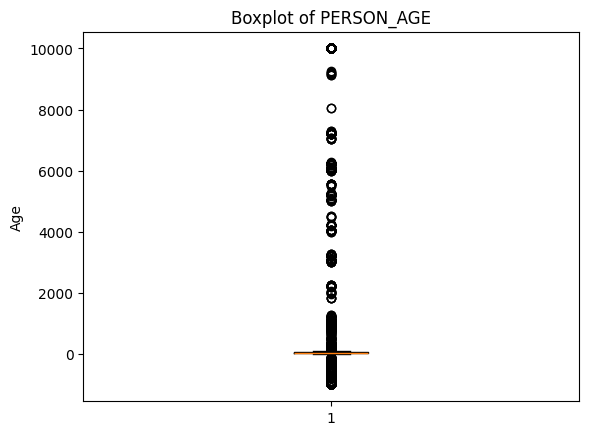

In [11]:
# Using boxplot (visual)

import matplotlib.pyplot as plt

plt.boxplot(df_persons['PERSON_AGE'].dropna())
plt.title("Boxplot of PERSON_AGE")
plt.ylabel("Age")
plt.show()

In [12]:
# IQR (Interquartile Range) method

Q1 = df_persons['PERSON_AGE'].quantile(0.25)
Q3 = df_persons['PERSON_AGE'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_persons[(df_persons['PERSON_AGE'] < lower_bound) |
                      (df_persons['PERSON_AGE'] > upper_bound)]

print(f"Number of outliers in PERSON_AGE: {len(outliers)}")
outliers[['PERSON_AGE', 'PERSON_TYPE', 'PERSON_SEX']].head()


Number of outliers in PERSON_AGE: 8416


,PERSON_AGE,PERSON_TYPE,PERSON_SEX
2881,1027.0,Occupant,F
3077,94.0,Occupant,F
3295,1061.0,Occupant,F
3624,1056.0,Occupant,M
3841,1056.0,Occupant,M


In [13]:
# Domain-based check
#For humans, valid ages are 0 < age < 120.

invalid_ages = df_persons[(df_persons['PERSON_AGE'] <= 0) | (df_persons['PERSON_AGE'] > 120)]
print(f"Invalid ages found: {len(invalid_ages)}")
invalid_ages[['PERSON_AGE', 'PERSON_TYPE', 'PERSON_SEX']].head(15)

Invalid ages found: 535328


,PERSON_AGE,PERSON_TYPE,PERSON_SEX
14,0.0,Occupant,U
168,0.0,Occupant,M
1024,0.0,Occupant,F
1234,0.0,Occupant,M
1311,0.0,Occupant,M
1529,0.0,Occupant,M
2080,0.0,Occupant,U
2736,0.0,Occupant,NaN
2881,1027.0,Occupant,F
3295,1061.0,Occupant,F


In [14]:
# Count invalid ages (<=0 or >=120)
invalid_age_count = df_persons[(df_persons['PERSON_AGE'] <= 0) | (df_persons['PERSON_AGE'] >= 120)].shape[0]
print("Invalid ages found:", invalid_age_count)

# Compute mean of valid ages
mean_age = df_persons.loc[(df_persons['PERSON_AGE'] > 0) & (df_persons['PERSON_AGE'] < 120), 'PERSON_AGE'].mean()
print("Mean valid age:", mean_age)

# Replace invalid ages with the mean
df_persons.loc[(df_persons['PERSON_AGE'] <= 0) | (df_persons['PERSON_AGE'] >= 120), 'PERSON_AGE'] = mean_age




Invalid ages found: 535378
Mean valid age: 40.3841382908642


In [16]:
# Replace missing (NaN) ages with the mean
df_persons['PERSON_AGE'].fillna(mean_age, inplace=True)

#verify the result
print("Remaining null ages:", df_persons['PERSON_AGE'].isna().sum())
print("Age column cleaned successfully ✅")

Remaining null ages: 0
Age column cleaned successfully ✅


/tmp/ipython-input-1343235837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_persons['PERSON_AGE'].fillna(mean_age, inplace=True)


###CONTRIBUTING_FACTOR_1 and CONTRIBUTING_FACTOR_2

In [17]:
for col in ['CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2']:
    df_persons[col] = df_persons[col].fillna('Unspecified')


In [18]:
# Find all distinct values in CONTRIBUTING_FACTOR_1 and CONTRIBUTING_FACTOR_2

cols_to_check = ['CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2']

for col in cols_to_check:
    if col in df_persons.columns:
        print(f"Distinct values in column '{col}':")
        # Display all unique values, as there are only 53 based on the previous info
        print(df_persons[col].unique())
        print("-" * 30)
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        print("-" * 30)

# what is the percentage of nulls in these coulmns
print("Percentage of nulls in CONTRIBUTING_FACTOR_1 and CONTRIBUTING_FACTOR_2:")
print(df_persons[cols_to_check].isnull().sum() / len(df_persons) * 100)


# Since the nulls are more than 80% in each column so we will drop them
df_persons = df_persons.drop(columns=cols_to_check)

# Display info of the modified dataframe to verify
df_persons.info()

Distinct values in column 'CONTRIBUTING_FACTOR_1':
['Unspecified' 'Animals Action'
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion']
------------------------------
Distinct values in column 'CONTRIBUTING_FACTOR_2':
['Unspecified' 'View Obstructed/Limited']
------------------------------
Percentage of nulls in CONTRIBUTING_FACTOR_1 and CONTRIBUTING_FACTOR_2:
CONTRIBUTING_FACTOR_1    0.0
CONTRIBUTING_FACTOR_2    0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 5423888 entries, 0 to 5817929
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   UNIQUE_ID            int64         
 1   COLLISION_ID         int64         
 2   PERSON_ID            object        
 3   PERSON_TYPE          object        
 4   PERSON_INJURY        object        
 5   VEHICLE_ID           float64       
 6   PERSON_AGE           float64       
 7   EJECTION             object        
 8   EMOTIONAL_STATUS     object        


In [19]:
df_persons.head(70)

,UNIQUE_ID,COLLISION_ID,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,PERSON_SEX,CRASH_DATETIME
0,10249006,4229554,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,40.384138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,U,2019-10-26 09:43:00
1,10255054,4230587,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.000000,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,F,2019-10-25 15:15:00
2,10253177,4230550,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,M,2019-10-26 17:55:00
4,10255516,4231168,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.000000,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,F,2019-10-25 11:16:00
5,10253606,4230743,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.000000,Not Ejected,Conscious,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,M,2019-10-24 19:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,10251056,4230439,4cd0f087-b091-4f0c-9ac3-b1a639444f1b,Bicyclist,Injured,19142063.0,35.000000,Ejected,Conscious,Elbow-Lower-Arm-Hand,Driver,NaN,NaN,NaN,Minor Bleeding,Driver,M,2019-10-26 00:05:00
70,10249123,4230398,ca2b8bfb-bb71-470a-8b95-3b891c4fec39,Occupant,Unspecified,19141162.0,41.000000,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt,NaN,NaN,Does Not Apply,Driver,M,2019-10-26 20:00:00
71,10252304,4229891,1db9a1ab-de15-4116-9572-7187babb5f17,Occupant,Unspecified,19142686.0,40.384138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,U,2019-10-26 19:30:00
72,10253631,4230790,e11e8ded-38ac-49e3-93ee-7a7a407e41ca,Occupant,Unspecified,19143359.0,44.000000,Not Ejected,Does Not Apply,Does Not Apply,Unknown,NaN,NaN,NaN,Does Not Apply,Driver,F,2019-10-25 11:45:00


###PERSON_SEX

In [20]:
cols_to_check = ['PERSON_SEX']

for col in cols_to_check:
    if col in df_persons.columns:
        print(f"Distinct values in column '{col}':")
        # Display all unique values, as there are only 53 based on the previous info
        print(df_persons[col].unique())
        print("-" * 30)
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        print("-" * 30)

Distinct values in column 'PERSON_SEX':
['U' 'F' 'M' nan]
------------------------------


In [21]:
# We will keep the "Undefined" and the "nan" will be Undefined
df_persons['PERSON_SEX'] = df_persons['PERSON_SEX'].fillna('U')

###POSITION_IN_VEHICLE and PERSON_AGE

In [22]:
# (0–3 years) -> Valid positions: "Child seat" or "If one person is seated on another person&apos;s lap"
# (4–12 years) -> Valid positions: "Right rear passenger or motorcycle sidecar passenger", "Left rear passenger".
# (>12 years) -> All normal positions are valid



#All Positions
 #'Front passenger, if two or more persons, including the driver, are in the front seat'
 #'Right rear passenger or motorcycle sidecar passenger'
 #'Driver'
 #'Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile'
 # Middle front seat, or passenger lying across a seat'
 #'Unknown'
 #'Middle rear seat, or passenger lying across a seat'
 #'Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc'
 #'Does Not Apply'
 #'Riding/Hanging on Outside'
 #'If one person is seated on another person&apos;s lap'




unlikely_occupant_positions_less3 = ['Riding/Hanging on Outside',
                                     'Driver',
                                     'Right rear passenger or motorcycle sidecar passenger']

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Occupant') &
    (df_persons['PERSON_AGE'] < 3) &
    (df_persons['POSITION_IN_VEHICLE'].isin(unlikely_occupant_positions_less3)),
    'POSITION_IN_VEHICLE'
] = 'Unknown'

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Occupant') &
    (df_persons['PERSON_AGE'] < 12) &
    (df_persons['POSITION_IN_VEHICLE']== 'Driver'),
    'POSITION_IN_VEHICLE'
] = 'Unknown'

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Bicyclist') &
    (df_persons['PERSON_AGE'] < 3) &
    (df_persons['POSITION_IN_VEHICLE']== 'Driver'),
    'POSITION_IN_VEHICLE'
] = 'Unknown'



display(df_persons.groupby(['PERSON_TYPE','PERSON_AGE', 'POSITION_IN_VEHICLE']).size().reset_index(name='count'))


,PERSON_TYPE,PERSON_AGE,POSITION_IN_VEHICLE,count
0,Bicyclist,1.0,"Front passenger, if two or more persons, inclu...",1
1,Bicyclist,1.0,If one person is seated on another person&apos...,1
2,Bicyclist,1.0,"Left rear passenger, or rear passenger on a bi...",5
3,Bicyclist,1.0,"Middle front seat, or passenger lying across a...",1
4,Bicyclist,1.0,"Middle rear seat, or passenger lying across a ...",1
...,...,...,...,...
2186,Pedestrian,30.0,Does Not Apply,1
2187,Pedestrian,31.0,Does Not Apply,1
2188,Pedestrian,42.0,Does Not Apply,1
2189,Pedestrian,61.0,Does Not Apply,1


###PERSON_TYPE , POSITION_IN_VEHICLE , PED_LOCATION , PED_ACTION and PED_ROLE

PED_LOCATION ✅ Pedestrian only

PED_ACTION ✅ Pedestrian only

PED_ROLE ✅ Pedestrian only

In [23]:
display(df_persons.groupby(['PERSON_TYPE', 'POSITION_IN_VEHICLE', 'PED_ROLE','PED_ACTION']).size().reset_index(name='count'))

,PERSON_TYPE,POSITION_IN_VEHICLE,PED_ROLE,PED_ACTION,count
0,Occupant,Does Not Apply,Other,Crossing Against Signal,1
1,Occupant,Does Not Apply,Other,Does Not Apply,1
2,Occupant,Unknown,Other,Does Not Apply,1
3,Occupant,Unknown,Other,Unknown,2
4,Pedestrian,Does Not Apply,Pedestrian,Crossing Against Signal,2
5,Pedestrian,Does Not Apply,Pedestrian,"Crossing, No Signal, or Crosswalk",1
6,Pedestrian,Does Not Apply,Pedestrian,Does Not Apply,1
7,Pedestrian,Does Not Apply,Pedestrian,Getting On/Off Vehicle Other Than School Bus,1
8,Pedestrian,Does Not Apply,Pedestrian,Not in Roadway,1
9,Pedestrian,Does Not Apply,Pedestrian,Other Actions in Roadway,1


In [24]:
# 1. Check if any Occupant / Bicyclist / Other Motorized have pedestrian fields filled
non_ped = df_persons[df_persons['PERSON_TYPE'] != 'Pedestrian']

invalid_non_ped = non_ped[
    non_ped[['PED_LOCATION','PED_ACTION','PED_ROLE']].notna().any(axis=1)
]
print(f"Non-pedestrians with pedestrian data: {len(invalid_non_ped)}")

# 2. Check if many pedestrians have all pedestrian fields missing
ped = df_persons[df_persons['PERSON_TYPE'] == 'Pedestrian']

missing_ped_info = ped[
    ped[['PED_LOCATION','PED_ACTION','PED_ROLE']].isna().all(axis=1)
]
print(f"Pedestrians missing all pedestrian info: {len(missing_ped_info)}")


Non-pedestrians with pedestrian data: 5423516
Pedestrians missing all pedestrian info: 0


In [25]:
# Non-pedestrians with pedestrian data
# That’s not logically valid, because those columns describe actions/locations only relevant for pedestrians.
# So those fields should be "Does Not Apply" for non-pedestrians.
non_pedestrian_condition = df_persons['PERSON_TYPE'] != 'Pedestrian'
ped_columns = ['PED_LOCATION', 'PED_ACTION', 'PED_ROLE']
df_persons.loc[non_pedestrian_condition, ped_columns] = 'Does Not Apply'

In [26]:
# Pedestrians missing all pedestrian info
# PERSON_TYPE is “Pedestrian”, but all 3 pedestrian-related columns are null.
# Very small number (20 rows) out of 5.8M — effectively negligible (<0.001%).
df_persons = df_persons.dropna(subset=['PED_LOCATION', 'PED_ACTION', 'PED_ROLE'], how='all')


In [27]:
df_persons = df_persons.drop(columns=['PED_ACTION', 'PED_LOCATION'], errors='ignore')

In [28]:
# Check that pedestrians do not have vehicle position data.
# Mask for pedestrians
mask_pedestrian = df_persons['PERSON_TYPE'] == 'Pedestrian'

# Check pedestrians that have invalid POSITION_IN_VEHICLE
invalid_ped_position = df_persons[mask_pedestrian &
                 (df_persons['POSITION_IN_VEHICLE'] != 'Does Not Apply')]

# Count and display
print(f"Number of pedestrians with invalid POSITION_IN_VEHICLE: {len(invalid_ped_position)}")
display(invalid_ped_position.head(50))

Number of pedestrians with invalid POSITION_IN_VEHICLE: 5


,UNIQUE_ID,COLLISION_ID,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,CRASH_DATETIME
1145131,6012820,3439206,605429,Pedestrian,Injured,17070459.0,43.0,NaN,Semiconscious,Unknown,NaN,NaN,Unknown,Pedestrian,M,2016-05-08 06:00:00
1207295,6186643,3463497,987012,Pedestrian,Injured,17153984.0,54.0,NaN,Conscious,Entire Body,NaN,NaN,Contusion - Bruise,Pedestrian,F,2016-06-17 18:40:00
1692772,7933835,3437491,383898dc-fd1c-443c-a78c-46c81571f9f0,Pedestrian,Injured,17996287.0,23.0,NaN,Conscious,Face,NaN,NaN,Fracture - Dislocation,Pedestrian,M,2016-05-09 16:37:00
3081719,6304931,3468489,f0bb75f3-0365-520c-9fc5-936cb838efd7,Pedestrian,Unspecified,17209296.0,58.0,NaN,Does Not Apply,Does Not Apply,NaN,NaN,Does Not Apply,Pedestrian,M,2016-06-25 12:50:00
3465812,6270903,4023085,950600,Pedestrian,Injured,17193325.0,27.0,NaN,Conscious,Elbow-Lower-Arm-Hand,NaN,NaN,Abrasion,Pedestrian,F,2016-06-11 12:28:00


In [29]:
#fix them by setting to "Does Not Apply"
df_persons.loc[mask_pedestrian, 'POSITION_IN_VEHICLE'] = 'Does Not Apply'


In [30]:
# Clean inconsistencies for Bicyclists
# POSITION_IN_VEHICLE should ideally be 'Does Not Apply' or perhaps 'Riding/Hanging on Outside' or 'Driver'/'Passenger' on a tandem/cargo bike.
# PED_ROLE should ideally be 'Driver' or 'Passenger' if applicable, or 'Does Not Apply' if the role is unclear or irrelevant.

unlikely_bicyclist_positions = [
 'Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc',
 'Front passenger, if two or more persons, including the driver, are in the front seat',
 'If one person is seated on another person&apos;s lap',
 'middle front seat, or passenger lying across a seat',
 'Middle rear seat, or passenger lying across a seat',
 'Middle front seat, or passenger lying across a seat',
 'Right rear passenger or motorcycle sidecar passenger'
]

likely_bicyclist_positions =['Driver',
                             'Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile',
                             'Unknown',
                             'Does Not Apply'
                             'Riding/Hanging on Outside']

#All Locations
 #'Front passenger, if two or more persons, including the driver, are in the front seat'
 #'Right rear passenger or motorcycle sidecar passenger'
 #'Driver'
 #'Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile'
 #'Middle front seat, or passenger lying across a seat'
 #'Unknown'
 #'Middle rear seat, or passenger lying across a seat'
 #'Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc'
 #'Does Not Apply'
 #'Riding/Hanging on Outside'
 #'If one person is seated on another person&apos;s lap'

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Bicyclist') &
    (df_persons['POSITION_IN_VEHICLE'].isin(unlikely_bicyclist_positions)),
    'POSITION_IN_VEHICLE'
] = 'Does Not Apply'



# Re-run the groupby to see the effect of cleaning
print("\nRelationship after cleaning Bicyclist inconsistencies:")
display(df_persons.groupby(['PERSON_TYPE', 'POSITION_IN_VEHICLE']).size().reset_index(name='count'))


Relationship after cleaning Bicyclist inconsistencies:


,PERSON_TYPE,POSITION_IN_VEHICLE,count
0,Bicyclist,Does Not Apply,804
1,Bicyclist,Driver,54362
2,Bicyclist,"Left rear passenger, or rear passenger on a bi...",705
3,Bicyclist,Riding/Hanging on Outside,5060
4,Bicyclist,Unknown,2135
5,Occupant,"Any person in the rear of a station wagon, pic...",81705
6,Occupant,Does Not Apply,1801
7,Occupant,Driver,2021480
8,Occupant,"Front passenger, if two or more persons, inclu...",364808
9,Occupant,If one person is seated on another person&apos...,938


In [31]:
# Analyze the relationship between PERSON_TYPE, POSITION_IN_VEHICLE, and PED_ROLE for Occupants
unlikely_occupant_positions = ['Riding/Hanging on Outside',
                               'Does Not Apply']

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Occupant') &
    (df_persons['POSITION_IN_VEHICLE'].isin(unlikely_occupant_positions)),
    'POSITION_IN_VEHICLE'
] = 'Unknown'

# Re-run the groupby to see the effect of cleaning for Occupants
print("\nRelationship after cleaning Occupant inconsistencies:")
display(df_persons[df_persons['PERSON_TYPE'] == 'Occupant'].groupby(['POSITION_IN_VEHICLE']).size().reset_index(name='count'))


Relationship after cleaning Occupant inconsistencies:


,POSITION_IN_VEHICLE,count
0,"Any person in the rear of a station wagon, pic...",81705
1,Driver,2021480
2,"Front passenger, if two or more persons, inclu...",364808
3,If one person is seated on another person&apos...,938
4,"Left rear passenger, or rear passenger on a bi...",138210
5,"Middle front seat, or passenger lying across a...",35851
6,"Middle rear seat, or passenger lying across a ...",44900
7,Right rear passenger or motorcycle sidecar pas...,139055
8,Unknown,82537


In [32]:
# Analyze the relationship between PERSON_TYPE, POSITION_IN_VEHICLE, and PED_ROLE for Other Motorized

unlikely_motorized_positions=[
                    'Front passenger, if two or more persons, including the driver, are in the front seat',
                    'Middle front seat, or passenger lying across a seat',
                    'Middle rear seat, or passenger lying across a seat',
                    'Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc']

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Other Motorized') &
    (df_persons['POSITION_IN_VEHICLE'].isin(unlikely_motorized_positions)),
    'POSITION_IN_VEHICLE'
] = 'Unknown'

In [33]:
# Re-run the groupby to see the effect of cleaning
print("\nRelationship after cleaning inconsistencies:")
display(df_persons.groupby(['PERSON_TYPE', 'POSITION_IN_VEHICLE']).size().reset_index(name='count'))


Relationship after cleaning inconsistencies:


,PERSON_TYPE,POSITION_IN_VEHICLE,count
0,Bicyclist,Does Not Apply,804
1,Bicyclist,Driver,54362
2,Bicyclist,"Left rear passenger, or rear passenger on a bi...",705
3,Bicyclist,Riding/Hanging on Outside,5060
4,Bicyclist,Unknown,2135
5,Occupant,"Any person in the rear of a station wagon, pic...",81705
6,Occupant,Driver,2021480
7,Occupant,"Front passenger, if two or more persons, inclu...",364808
8,Occupant,If one person is seated on another person&apos...,938
9,Occupant,"Left rear passenger, or rear passenger on a bi...",138210


###BODILY_INJURY , EJECTION , PED_ACTION , EMOTIONAL_STATUS , COMPLAINT and PERSON_INJURY

In [34]:
# Drop the rows having all missing values in these columns
cols_to_check = [
    'EJECTION',
    'EMOTIONAL_STATUS',
    'BODILY_INJURY',
    'COMPLAINT',
    'POSITION_IN_VEHICLE',
    'SAFETY_EQUIPMENT'
]
df_persons = df_persons.dropna(subset=cols_to_check, how='all')

In [ ]:
# Find all distinct values in BODILY_INJURY

cols_to_check = ['BODILY_INJURY','EJECTION','PERSON_INJURY', 'SAFETY_EQUIPMENT', 'EMOTIONAL_STATUS']

for col in cols_to_check:
    if col in df_persons.columns:
        print(f"Distinct values in column '{col}':")
        # Display all unique values, as there are only 53 based on the previous info
        print(df_persons[col].unique())
        print("-" * 30)
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        print("-" * 30)

Distinct values in column 'BODILY_INJURY':
[nan 'Does Not Apply' 'Back' 'Shoulder - Upper Arm' 'Knee-Lower Leg Foot'
 'Head' 'Elbow-Lower-Arm-Hand' 'Chest' 'Neck' 'Unknown' 'Hip-Upper Leg'
 'Entire Body' 'Abdomen - Pelvis' 'Face' 'Eye']
------------------------------
Distinct values in column 'EJECTION':
[nan 'Not Ejected' 'Ejected' 'Partially Ejected' 'Does Not Apply'
 'Trapped' 'Unknown']
------------------------------
Distinct values in column 'PERSON_INJURY':
['Unspecified' 'Injured' 'Killed']
------------------------------
Distinct values in column 'SAFETY_EQUIPMENT':
[nan 'Lap Belt & Harness' 'Lap Belt' 'Unknown' 'Other'
 'Child Restraint Only' 'Helmet Only (In-Line Skater/Bicyclist)'
 'Helmet (Motorcycle Only)' 'Air Bag Deployed/Lap Belt/Harness' '-'
 'Air Bag Deployed' 'Air Bag Deployed/Lap Belt'
 'Helmet/Other (In-Line Skater/Bicyclist)' 'Harness'
 'Air Bag Deployed/Child Restraint'
 'Stoppers Only (In-Line Skater/Bicyclist)'
 'Pads Only (In-Line Skater/Bicyclist)' 'Lap Belt/H

In [ ]:
# PERSON_INJURY BODILY_INJURY EJECTION SAFETY_EQUIPMENT

# Analyze the relationship between PERSON_INJURY, BODILY_INJURY, EJECTION and SAFETY_EQUIPMENT
print("Relationship between PERSON_INJURY, BODILY_INJURY, EJECTION and SAFETY_EQUIPMENT:")
display(df_persons.groupby(['PERSON_INJURY', 'BODILY_INJURY', 'EJECTION', 'SAFETY_EQUIPMENT', 'EMOTIONAL_STATUS']).size().reset_index(name='count'))


Relationship between PERSON_INJURY, BODILY_INJURY, EJECTION and SAFETY_EQUIPMENT:


,PERSON_INJURY,BODILY_INJURY,EJECTION,SAFETY_EQUIPMENT,EMOTIONAL_STATUS,count
0,Injured,Abdomen - Pelvis,Does Not Apply,-,Conscious,25
1,Injured,Abdomen - Pelvis,Does Not Apply,-,Does Not Apply,1
2,Injured,Abdomen - Pelvis,Does Not Apply,-,Shock,1
3,Injured,Abdomen - Pelvis,Does Not Apply,Harness,Conscious,1
4,Injured,Abdomen - Pelvis,Does Not Apply,Helmet (Motorcycle Only),Conscious,39
...,...,...,...,...,...,...
2584,Unspecified,Unknown,Unknown,Lap Belt & Harness,Does Not Apply,9
2585,Unspecified,Unknown,Unknown,Unknown,Conscious,2
2586,Unspecified,Unknown,Unknown,Unknown,Does Not Apply,13
2587,Unspecified,Unknown,Unknown,Unknown,Unconscious,1


In [35]:
import numpy as np
import pandas as pd
# See top complaint for each injury
top_complaints = (
    df_persons.groupby('BODILY_INJURY')['COMPLAINT']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)
print(top_complaints)

# Step 1: Compute most common complaint per injury
injury_to_complaint = (
    df_persons.loc[df_persons['BODILY_INJURY'].notna()]
    .groupby('BODILY_INJURY')['COMPLAINT']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .to_dict()
)

# Step 2: Define invalid complaint entries
invalid_complaints = ['Does Not Apply', 'Unknown', np.nan]

# Step 3: Function to fill missing/invalid complaints based on injury
def fill_complaint(row):
    complaint = row['COMPLAINT']
    injury = row['BODILY_INJURY']

    if complaint in invalid_complaints or pd.isna(complaint):
        # If injury has a known most common complaint, use it
        if injury in injury_to_complaint:
            return injury_to_complaint[injury]
        else:
            return 'Unknown'  # fallback if injury is NaN or has no mode
    else:
        return complaint

# Step 4: Apply the rule
df_persons['COMPLAINT'] = df_persons.apply(fill_complaint, axis=1)

BODILY_INJURY
Abdomen - Pelvis        Complaint of Pain or Nausea
Back                    Complaint of Pain or Nausea
Chest                   Complaint of Pain or Nausea
Does Not Apply                       Does Not Apply
Elbow-Lower-Arm-Hand    Complaint of Pain or Nausea
Entire Body             Complaint of Pain or Nausea
Eye                     Complaint of Pain or Nausea
Face                                 Minor Bleeding
Head                    Complaint of Pain or Nausea
Hip-Upper Leg           Complaint of Pain or Nausea
Knee-Lower Leg Foot     Complaint of Pain or Nausea
Neck                    Complaint of Pain or Nausea
Shoulder - Upper Arm    Complaint of Pain or Nausea
Unknown                                     Unknown
Name: COMPLAINT, dtype: object


In [45]:
# Find records where a person was ejected but not injured
ejected_not_injured = df_persons[(df_persons['EJECTION'] == 'Ejected')&(df_persons['PERSON_INJURY'] == 'Unspecified')]

print(f"Number of records where a person was ejected but not injured: {len(ejected_not_injured)}")
if not ejected_not_injured.empty:
    display(ejected_not_injured)

Number of records where a person was ejected but not injured: 0


In [40]:
# Find all distinct values in EJECTION

cols_to_check = ['EJECTION','PERSON_INJURY']

for col in cols_to_check:
    if col in df_persons.columns:
        print(f"Distinct values in column '{col}':")
        # Display all unique values, as there are only 53 based on the previous info
        print(df_persons[col].unique())
        print("-" * 30)
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        print("-" * 30)

Distinct values in column 'EJECTION':
['Not Ejected' 'Ejected' 'Partially Ejected' 'Trapped' 'Does Not Apply'
 'Unknown' nan]
------------------------------
Distinct values in column 'PERSON_INJURY':
['Unspecified' 'Injured' 'Killed']
------------------------------


In [43]:
# EJECTION

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Bicyclist'),
    'EJECTION'
] = 'Does Not Apply'


df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Other Motorized'),
    'EJECTION'
] = 'Does Not Apply'

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Pedestrian'),
    'EJECTION'
] = 'Does Not Apply'

df_persons.loc[
    (df_persons['PERSON_TYPE'] == 'Occupant')&
    (df_persons['EJECTION'] == 'Does Not Apply'),
    'EJECTION'
] = 'Unknown'


In [44]:
df_persons.loc[
    (df_persons['EJECTION'] == 'Ejected')&
    (df_persons['PERSON_INJURY'] != 'Killed'),
    'PERSON_INJURY'
] = 'Injured'

df_persons.loc[
    (df_persons['PERSON_INJURY'] == 'Killed'),
    'EMOTIONAL_STATUS'
] = 'Apparent Death'

df_persons.loc[
    (df_persons['EJECTION'] == 'Ejected')&
    (df_persons['BODILY_INJURY'] == 'Head')&
    (df_persons['EMOTIONAL_STATUS'] == 'Unconscious'),
    'PERSON_INJURY'
] = 'Killed'

In [48]:
mask_unspecified = (
    (df_persons['PERSON_INJURY'] == 'Unspecified') &
    (df_persons['EMOTIONAL_STATUS'] == 'Does Not Apply') &
    (df_persons['BODILY_INJURY'] == 'Does Not Apply') &
    (df_persons['COMPLAINT'] == 'Does Not Apply')
)

count_unspecified = df_persons[mask_unspecified].shape[0]
print("Number of rows with PERSON_INJURY='Unspecified' and others='Does Not Apply':", count_unspecified)

Number of rows with PERSON_INJURY='Unspecified' and others='Does Not Apply': 2505948


###SAFETY_EQUIPMENT

In [49]:
count_unknown_safety = df_persons[df_persons['SAFETY_EQUIPMENT'] == 'Unknown'].shape[0]
print("Number of rows with SAFETY_EQUIPMENT='Unknown':", count_unknown_safety)

Number of rows with SAFETY_EQUIPMENT='Unknown': 478437


In [47]:
col = 'SAFETY_EQUIPMENT'
null_count = df_persons[col].isna().sum()
total_rows = len(df_persons)
null_percent = (null_count / total_rows) * 100

print(f"Column: {col}")
print(f"Missing values: {null_count:,}")
print(f"Missing percentage: {null_percent:.2f}%")

Column: SAFETY_EQUIPMENT
Missing values: 200,000
Missing percentage: 6.70%


In [50]:
 #Distinct values in column 'SAFETY_EQUIPMENT':
 # nan
 #'Lap Belt & Harness'
 #'Lap Belt'
 #'Unknown'
 #'Other'
 #'Child Restraint Only'
 #'Helmet Only (In-Line Skater/Bicyclist)'
 #'Helmet (Motorcycle Only)'
 #'Air Bag Deployed/Lap Belt/Harness'
 #'-'
 #'Air Bag Deployed'
 #'Air Bag Deployed/Lap Belt'
 #'Helmet/Other (In-Line Skater/Bicyclist)'
 #'Harness'
 #'Air Bag Deployed/Child Restraint'
 #'Stoppers Only (In-Line Skater/Bicyclist)'
 #'Pads Only (In-Line Skater/Bicyclist)'
 #'Lap Belt/Harness'


df_persons.loc[
    (df_persons['PED_ROLE'] == 'Pedestrian'),
    'SAFETY_EQUIPMENT'
] = 'Unknown'

unlikely_skater_safetyeq = ['Lap Belt & Harness','Lap Belt']

df_persons.loc[
    (df_persons['PED_ROLE'] == 'In-Line Skater') &
    (df_persons['SAFETY_EQUIPMENT'].isin(unlikely_skater_safetyeq)),
    'SAFETY_EQUIPMENT'
] = 'Unknown'

df_persons.loc[
    (df_persons['PED_ROLE'] == 'In-Line Skater') &
    (df_persons['SAFETY_EQUIPMENT'] == 'In-Line Skater'),
    'POSITION_IN_VEHICLE'
] = 'Driver'

### Standardize formats and Remove duplicates.





In [ ]:
# Standardize formats (dates, strings, categories)
# Convert CRASH_DATE and CRASH_TIME to datetime objects
df_persons['CRASH_DATE'] = pd.to_datetime(df_persons['CRASH_DATE'])
# Combine date and time, coercing errors will result in NaT for invalid combinations
df_persons['CRASH_DATETIME'] = pd.to_datetime(df_persons['CRASH_DATE'].astype(str) + ' ' + df_persons['CRASH_TIME'], errors='coerce')

# Standardize string columns (e.g., lowercasing)
for col in ['PERSON_TYPE', 'PERSON_INJURY', 'PERSON_SEX', 'PED_ROLE',
            'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
            'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
            'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2']:
    if col in df_persons.columns:
        df_persons[col] = df_persons[col].astype(str).str.lower().str.strip().replace('nan', 'unknown') # Handle NaNs introduced by imputation


# Remove duplicates
df_persons = df_persons.drop_duplicates().copy()

# Display info of the cleaned dataframe
df_persons.info()
display(df_persons.head())

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
# Replace the path and filename as you like
output_path = '/content/drive/MyDrive/cleaned_persons_data.csv'

# Save the DataFrame to CSV
df_persons.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved successfully at: {output_path}")

✅ Cleaned data saved successfully at: /content/drive/MyDrive/cleaned_persons_data.csv


In [51]:
df_persons.shape

(2984777, 16)

# **Step4 Integration**

# **Step5 Cleaning The Data (Post-Integration)**

# **Step6 Building an Interactive Website (Dash)**